<a href="https://colab.research.google.com/github/Circle-vip/Yandex_practicum/blob/main/%D0%90_%D0%92_%D1%82%D0%B5%D1%81%D1%82%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тестирование гипотез по увеличению выручки для интеренет-магазина. 

## Описание данных:


***Hypothesis***

Файл /content/hypothesis.csv

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**ГИПОТЕЗЫ:**

1) Запустить акцию, дающую скидку на товар в день рождения.	
2) Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей.	
3)	Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.	
4)	Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию.	
5)	Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа.	
6)	Запустить собственную службу доставки, что сократит срок доставки заказов.	
7)	Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов.	
8)	Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар.	
9)	Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.	

***Orders***

Файл /content/orders.csv 

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

***Visitors***

Файл /content/visitors.csv

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Цели:** 

1. Приоритезировать гипотезы.

2. Проанализировать А\В тест.

## Обзор данных.

In [ ]:
import pandas as pd
import numpy as np
import warnings
import datetime as dt
import math as mth
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
hypothesis = pd.read_csv('/content/hypothesis.csv')
visitors = pd.read_csv('/content/orders.csv')
orders = pd.read_csv('/content/orders.csv')

In [ ]:
#Чтобы окна об ошибках не мешали
warnings.filterwarnings('ignore')

In [ ]:
# Фуникция первичного знакомства с данными
# Функция, которая сразу выводит всю информацию, принимая на вход название датасета
def data_view(data):
    #Сразу приводим названия всех колонок к змеиному регистру.    
    data.columns = data.columns. \
                                str.replace(r'([a-z0-9])([A-Z])' , r'\1_\2', regex = True). \
                                str.replace(r'(.)([A-Z][a-z]+)', r'\1_\2', regex = True). \
                                str.replace(r'([a-z0-9])([A-Z])', r'\1_\2', regex = True). \
                                str.replace(r'__([A-Z])', r'_\1', regex = True). \
                                str.replace(r'__([a-z0-9])', r'_\1', regex = True)
    data.columns = data.columns.str.lower()
    print()
    print('------------------ Первые 5 строк данных -------------------')
    display(data.head()) # Выводим первые 5 строк
    print()
    print('------------------ Последние 5 строк данных -----------------')
    display(data.tail()) # Выводим последние 5 строк
    print()
    print('------------------ Информация по датасету --------------------')
    print()
    display(data.info()) # Выводим инфо по датасету
    print()
    # Уточняем количество пропусков по столбцам. Берем сумму пропусков и процентную долю пропусков
    print('------------------ Пропуски и уникальные значения (без учета пропусков) ---------------' )
    display(pd.concat([data.isna().sum().rename('nan_count'), 
                       data.isna().mean().rename('nan_percent'),
                       data.nunique().rename('unique_values')], 
                      axis=1).style.format({'nan_percent' : '{:.2%}'})) 
    print()    
    print('------------------ Дубликаты -----------------------')
    print()
    print('Количество явных дубликатов:', data.duplicated().sum())
    print()

In [ ]:
display(data_view(hypothesis))


------------------ Первые 5 строк данных -------------------


,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1



------------------ Последние 5 строк данных -----------------


,hypothesis,reach,impact,confidence,efforts
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5



------------------ Информация по датасету --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None


------------------ Пропуски и уникальные значения (без учета пропусков) ---------------


,nan_count,nan_percent,unique_values
hypothesis,0,0.00%,9
reach,0,0.00%,6
impact,0,0.00%,7
confidence,0,0.00%,7
efforts,0,0.00%,6



------------------ Дубликаты -----------------------

Количество явных дубликатов: 0



None

In [ ]:
display(data_view(orders))


------------------ Первые 5 строк данных -------------------


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



------------------ Последние 5 строк данных -----------------


,transaction_id,visitor_id,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B



------------------ Информация по датасету --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None


------------------ Пропуски и уникальные значения (без учета пропусков) ---------------


,nan_count,nan_percent,unique_values
transaction_id,0,0.00%,1197
visitor_id,0,0.00%,1031
date,0,0.00%,31
revenue,0,0.00%,713
group,0,0.00%,2



------------------ Дубликаты -----------------------

Количество явных дубликатов: 0



None

In [ ]:
display(data_view(visitors))


------------------ Первые 5 строк данных -------------------


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



------------------ Последние 5 строк данных -----------------


,transaction_id,visitor_id,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B



------------------ Информация по датасету --------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None


------------------ Пропуски и уникальные значения (без учета пропусков) ---------------


,nan_count,nan_percent,unique_values
transaction_id,0,0.00%,1197
visitor_id,0,0.00%,1031
date,0,0.00%,31
revenue,0,0.00%,713
group,0,0.00%,2



------------------ Дубликаты -----------------------

Количество явных дубликатов: 0



None

In [ ]:
#Перевод столбцов с датой к нужному типу
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

#Узнаем период исследования
print('Начало теста: ', visitors['date'].min())
print('Конец  теста: ', visitors['date'].max())
print('Продолжительность теста: ', visitors['date'].max() - visitors['date'].min())



Начало теста:  2019-08-01 00:00:00
Конец  теста:  2019-08-31 00:00:00
Продолжительность теста:  30 days 00:00:00


In [ ]:
print('Кол-во групп в тесте: ', visitors['group'].unique())

Кол-во групп в тесте:  ['B' 'A']


In [ ]:
print('Кол-во пользователей в группе А: ', visitors.query('group == "A"')['visitor_id'].nunique())
print('Кол-во пользователей в группе B: ', visitors.query('group == "B"')['visitor_id'].nunique())

Кол-во пользователей в группе А:  503
Кол-во пользователей в группе B:  586


In [ ]:
#Функция по поиску пересечений в группах

def check_ab_crossing(data, col_ab, col_id):
    # Получаем все уникальные значения групп A/B теста (0)
    test_groups = data[col_ab].unique()
    # Задаем переменную, в которой будем копить дубли
    dubl_id = []
    # Будем сравнивать попарно. Для этого запускаем два цикла по уникальным значениям групп
    for i in test_groups:
        for j in test_groups:
            if i != j: # нам неинтересно сравнивать группу саму с сабой. Берем только отличия
                # выполняем merge inner для данных по каждой группе (важно, работаем с парами групп). Сохраняем в dubl
                dubl = (data.loc[data[col_ab] == i]).merge(data.loc[data[col_ab] == j], on=col_id, how='inner')
                # в виде списка отбираем значения в столбце с id пользователя для получившегося датафрейма дублей, если есть
                dubl_id += dubl[col_id].to_list() # накапливаем в переменной дубли старые и новые
                dubl_id = list(set(dubl_id)) # отбираем только уникальные значения
    # Выводим информацию о результате
    if len(dubl_id) != 0:
        print()
        print('Обнаружены пересечения по пользователям в группах A/B теста в количестве: ' 
              +'{}'.format(len(dubl_id)) 
              + ' шт.')
    else:
        print()
        print('Пересечения по пользователям в группах A/B теста не обнаружены.' )
    return dubl_id

dubl_id = check_ab_crossing(orders, 'group', 'visitor_id')


Обнаружены пересечения по пользователям в группах A/B теста в количестве: 58 шт.


Данные приведены к нужным типам. Дубликатов и пропусков не обнаружено. В тесте две группы - А и В. В группе А - 18736 пользователей, в группе В - 18916, что на 0.9%, больше группы А, но процент слишком маленький, можно допустить такую погрешность.

 - Дата начала теста - 2019-08-01, 
 - Конец  теста - 2019-08-31.

58 пользователей вошли в обе группы тестирования. Удалять не буду, их слишком мало, оставлю как есть.

## Часть 1. Приоритизация гипотез.

In [ ]:
# приоритизируем гипотезы по двум методам
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [ ]:
display(hypothesis[['hypothesis', 'ICE', 'RICE']].sort_values(by=['ICE', 'RICE'], ascending=False).
       reset_index(drop=True).style.
       format({'ICE':'{:.2f}', 'RICE':'{:.2f}'}).
       bar(subset=['RICE', 'ICE'],
          align='mid',
          color=['darkblue']).
        set_properties(**{'text-align':'center'}, subset=['ICE', 'RICE']))

,hypothesis,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.00
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.00
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.00


- По методу ICE приоритетной для поверки гипотезой являяется "Запустить акцию, дающую скидку на товар в день рождения". 
- По методу RICE - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".	

Приоритезация изменилась потому, что добавился Reach(охват), и все показатели с высокой оценкой, а Efforts(цена теста) на среднем уровне.

## Часть 2. Анализ A/B-теста.

### График кумулятивной выручки по группам.

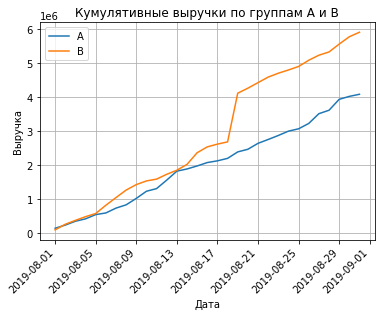

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitor_id' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Кумулятивные выручки по группам А и В')
plt.xlabel("Дата")
plt.ylabel("Выручка")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


Выручки в обоих группах стабильно растут. Группа В показывает лучший результат и наблюдается резкий скачок вверх после 18.08.2019. Это либо увеличение числа заказов, либо появление очень дорогих заказов.

### График кумулятивного среднего чека по группам. 

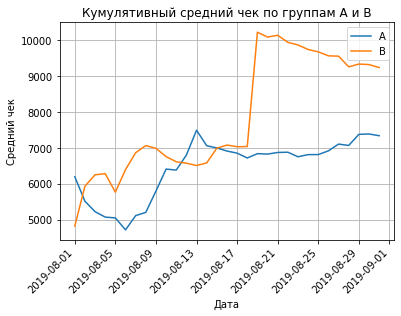

In [ ]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('Кумулятивный средний чек по группам А и В')
plt.xlabel("Дата")
plt.ylabel("Средний чек")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Средний чек группы В стабильно растет и так же виден скачок 18.08.2019 как и на прошлом графике. Однако уже через  несколько дней наблюдается снижение среднего чека. Значит был какой-то крупный заказ судя по всему.  Средний чек группы А сначала проседал, но потом быстро пошел вверх и стабилизировался на отметке 7000-7500р.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

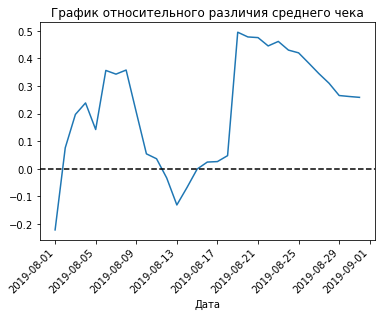

In [ ]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b,
    left_on='date',
    right_on='date',
    how='left', 
    suffixes=['A', 'B']
)

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.title('График относительного различия среднего чека')
plt.xlabel("Дата")
plt.xticks(rotation=45, ha='right')


# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График неравномерный, скачет. Определенно были какие-то выбросы в заказах.

### График кумулятивной конверсии по группам.

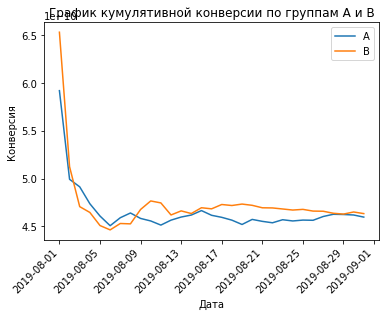

In [ ]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам А и В')
plt.xlabel("Дата")
plt.ylabel('Конверсия')
plt.xticks(rotation=45, ha='right')
#plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31),0, 0.050]) 
plt.legend()
plt.show()

Заметно небольшое колебание в начале теста, но затем данные стабилизировались. Группа В стабильно лучше группы А по конверсии. 

### График относительного изменения кумулятивной конверсии группы B к группе A. 

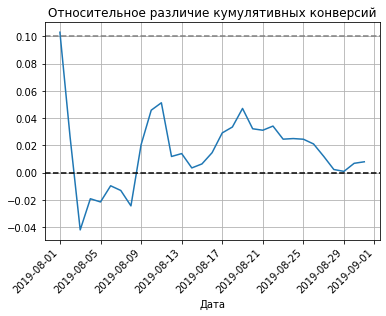

In [ ]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])


plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.title('Относительное различие кумулятивных конверсий')
plt.xlabel('Дата')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()


В начале, группа В немного проигрывала группе А, но затем резко подскочила и постепенно стабилизировалась.

### Точечный график количества заказов по пользователям.

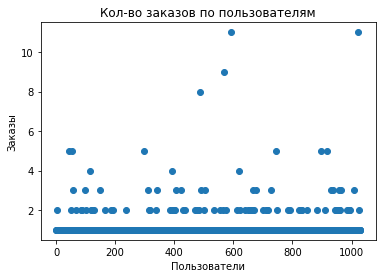

In [ ]:
orders_by_users = (
    orders
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.title('Кол-во заказов по пользователям')
plt.ylabel("Заказы")
plt.xlabel("Пользователи");

In [ ]:
print('95-й и 99-й прецентили:', np.percentile(orders_by_users['orders'], [95, 99]))

95-й и 99-й прецентили: [2. 4.]


Не более 5% пользователей делали заказы более 2 раз и не более 1% пользователей делали заказ более 4 раз. Граница - не более 4 заказов на пользователя.

### Точечный график стоимостей заказов. 

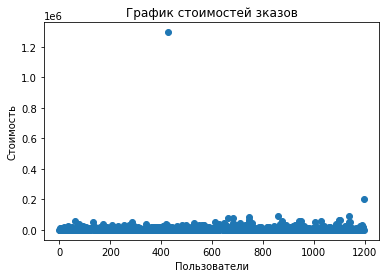

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей зказов')
plt.ylabel('Стоимость')
plt.xlabel("Пользователи");

In [ ]:
print('95-й и 99-й прецентили:', np.percentile(orders['revenue'], [95, 99]))

95-й и 99-й прецентили: [28000.  58233.2]


Не более 5% заказов дороже 28000 и не более 1% заказов дороже 58233. Граница - не более 28000.

### Стистическая значимость различий в конверсии между группами по «сырым» данным.

In [ ]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitor_id']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitor_id']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

data = visitors_a_daily.merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    
data.head(3)

,date,visitors_per_date_a,visitors_per_date_b
0,2019-08-15,4069496402,3312258926
1,2019-08-15,4069496402,3642806036
2,2019-08-15,4069496402,1196621759


In [ ]:
# создаем переменные, в которых собраны пользователи с числом совершенных заказов
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']


- Нулевая гипотеза: различий в конверсии между группами нет.
- Альтернативная гипотеза: различия в конверсии между группами есть.

In [ ]:
# создаем переменные, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули.
sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_daily['visitors_per_date_a'].count() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_daily['visitors_per_date_b'].count() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

# расчитываем статистическую значимость различий по методу Манна-Уитни
print('p_value = '"{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительный прирост конверсии группы B: '"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))


p_value = 0.296
Относительный прирост конверсии группы B: 0.000


p-value меньше 0.05, а значит нулевую гипотезу о том, статистически значимых различий в конверсии между группами нет - отвергаем. Конверсия группы В относительно А увеличилась на 13.8%.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

 - Нулевая гипотеза: различий в среднем чеке между группами нет. 
 
 - Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
print('p_value = ''{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке между группами: ''{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p_value = 0.365
Относительные различия в среднем чеке между группами: 0.259


p-value больше 0.05, значит Нулевую гипотезу, о том, что различий в среднем чеке между группами нет - не отвергаем. Хотя средний чек группы В значительно выше, чем в группе А.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>
<b>Все отлично!👍:</b> 

Верно сформулированы гипотезы, выбран тест и подсчитан p-значение. Верный выводы об отвержении гипотез

### Статистическая значимость различий в конверсии между группами по «очищенным» данным.

- Нулевая гипотеза: различий в конверсии между группами нет. 
 
- Альтернативная гипотеза: различия в конверсии между группами есть.

In [ ]:
# делаем срезы пользователей
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 4]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 4]['user_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
ab_normal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Кол-во аномальных пользователей: ', ab_normal_users.shape[0])

Кол-во аномальных пользователей:  59


In [ ]:
# создаем новые переменные для отфильтрованных данных 
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(ab_normal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_daily['visitors_per_date_a'].count() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(ab_normal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_daily['visitors_per_date_b'].count() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p_value = ''{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительный прирост конверсии в группе B: ''{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p_value = 0.293
Относительный прирост конверсии в группе B: 0.005


p-value почти не изменился, относительно сырых данных. Нулевую гипотезу все так же отвергаем. Конверсия в группе В немного увеличилась - 14.5%. Группа В все так же показывает лучший результат по конверсии относительно группы А.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

 - Нулевая гипотеза: различий в среднем чеке между группами нет. 
 
 - Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [ ]:
print('p_value = '
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(ab_normal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(ab_normal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительная разница в среднем чеке между группами: '
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(ab_normal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(ab_normal_users)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p_value = 0.481
Относительная разница в среднем чеке между группами: -0.014


p-value значительно увеличился в сравнение с "сырыми данными". Нулевую гипотезу не отвергаем. И разница ммежду группами значительно сократилась - с 25% до 1%. Тут видно, как выбросы повлияли.

**ОБЩИЙ ВЫВОД:** 

- Есть статистически значимое различие по конверсии между группами. 

- Разница между средними чеками групп значитильно снизилась после фильтрации данных. 

- График различия конверсий между группами говорит о том, что группа В стабильно лучше группы А по конверсии.

- График различия среднего чека очень неравномерный, по нему нельзя судить, повлияли выбросы.

По итогу теста могу сказать,  что результаты группы В уверенно показывают лучший результат, тест можно считать успешным. Тест можно закончить, так как показатели стабилизировались и уже хорошо видно, что вариант В можно выбрать как рабочий.